Telco Customer Churn

1. Data collection and exploration

In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#list of all columns
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
#number of columns and rows in the dataset
df.shape

(7043, 21)

In [5]:
#data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#removing rows having black space in total charges and converting the column to float
df= df[df['TotalCharges'].str.strip() != '']

In [7]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
#identifying missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#removing customerid column (Not required)
df = df.drop('customerID', axis=1)

In [10]:
#summary of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


2. Data cleaning and transformation

In [12]:
#dropping rows if all values are missing
df = df.dropna(how='all')

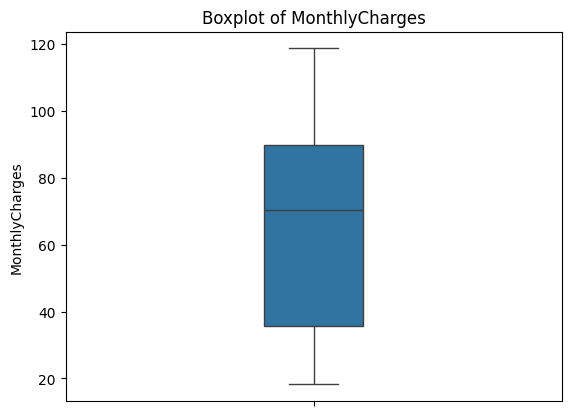

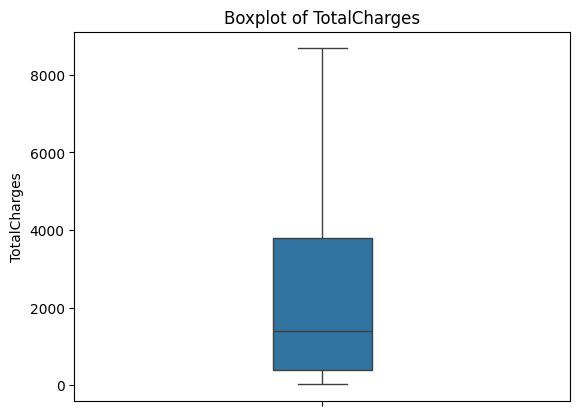

In [13]:
#identifying outliers for numerical columns using box plots
num = ['MonthlyCharges', 'TotalCharges']
for i in num:
    sns.boxplot(y=df[i] , width=0.2)
    plt.title(f'Boxplot of {i}')
    plt.show()

In [14]:
#checking for outliers using statistical method
for i in num:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[i] < lower) | (df[i] > upper)]
    print(f'Number of outliers in {i}: {len(outliers)}')

Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


There are no outliers in Monthly and Total charges.

In [15]:
#applying one hot encoder for catgorical columns
cat_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


3. Exploratory Data Analysis (EDA)

In [16]:
#Counting churned and not churned customers based on number of subscribed services 
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServices'] = df[services].apply(lambda row: (row == 'Yes').sum(), axis=1)
grouped = df.groupby(['TotalServices', 'Churn']).size().reset_index(name='Count')
pivot = grouped.pivot(index='TotalServices', columns='Churn', values='Count').fillna(0).astype(int)
pivot.columns.name = None
pivot = pivot.rename(columns={'Yes': 'Churned', 'No': 'Not_Churned'})
pivot['Total_Customers'] = pivot['Churned'] + pivot['Not_Churned']
pivot = pivot.reset_index().set_index('TotalServices')
pivot

,Not_Churned,Churned,Total_Customers
TotalServices,,,
0,45,35,80
1,1338,359,1697
2,796,390,1186
3,613,352,965
4,632,289,921
5,674,232,906
6,522,152,674
7,346,49,395
8,197,11,208


In [17]:
#calculating churn rate per total services
pivot['ChurnRate'] = pivot['Churned']/pivot['Total_Customers']
pivot

,Not_Churned,Churned,Total_Customers,ChurnRate
TotalServices,,,,
0,45,35,80,0.437500
1,1338,359,1697,0.211550
2,796,390,1186,0.328836
3,613,352,965,0.364767
4,632,289,921,0.313789
5,674,232,906,0.256071
6,522,152,674,0.225519
7,346,49,395,0.124051
8,197,11,208,0.052885


According to churn rate, customers are less likely to churn when they subscribe to more services (decreasing churn rate with increase in subscribed services). 

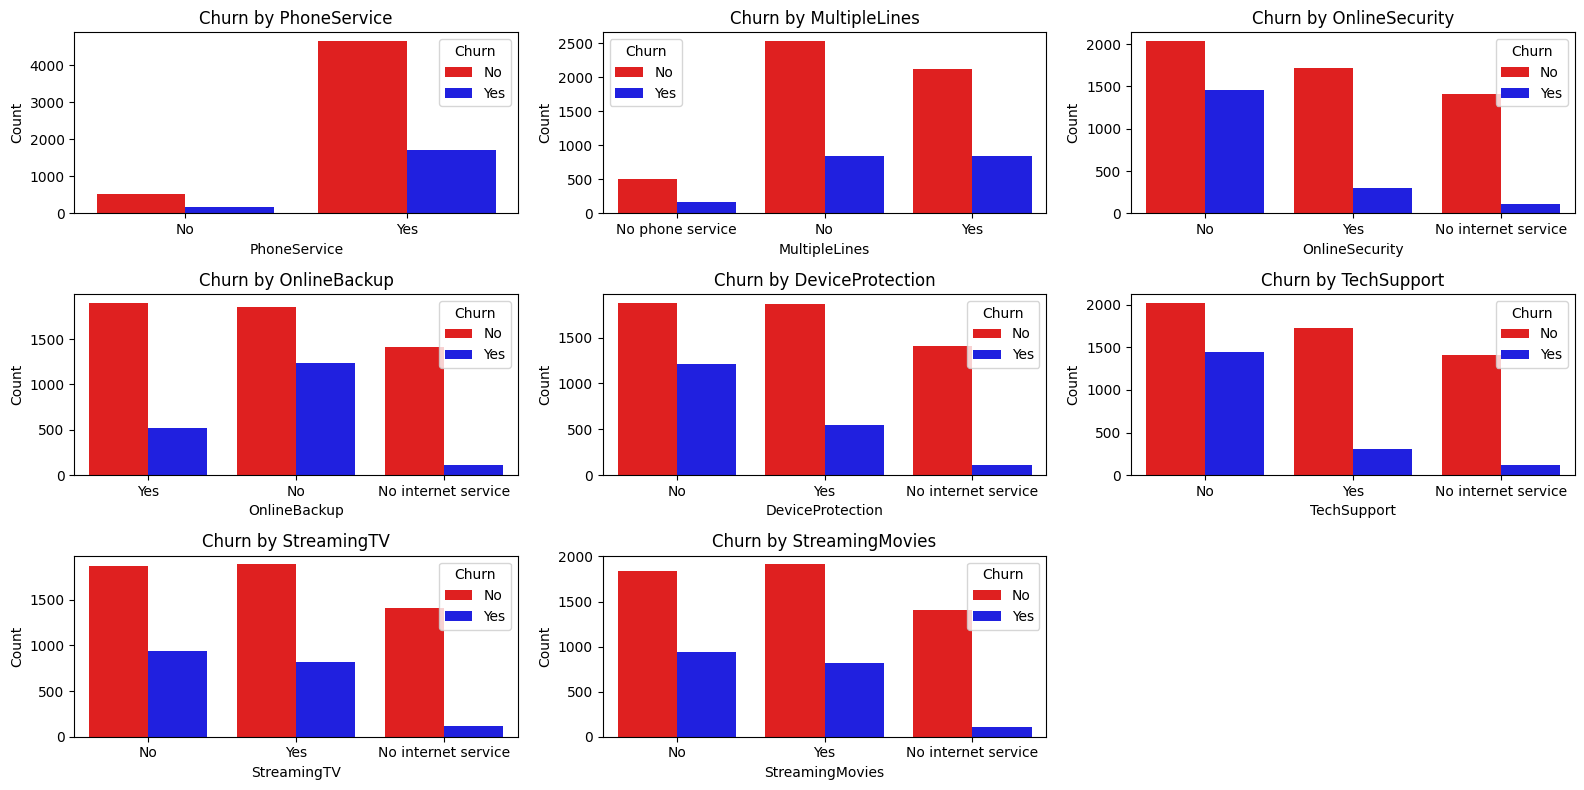

In [18]:
#visualizing the subscribed services using count plot
fig, axes = plt.subplots(3,3, figsize=(16,8))
axes = axes.flatten()  #converts 2D array to 1D for easy looping

for i, col in enumerate(services):
    sns.countplot(data=df, x= col, hue='Churn', palette=['red', 'blue'], ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
for j in range(len(services), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

1. Majority of customers have phone services, with low churn rate.
2. No significant difference in churn between customers having multiple or single lines.
3. Customers not subscribed to value adding services (security, backup, protection, support) churn more.
4. Streaming options might increase customer retention (more churn when not subscribed to streaming services).

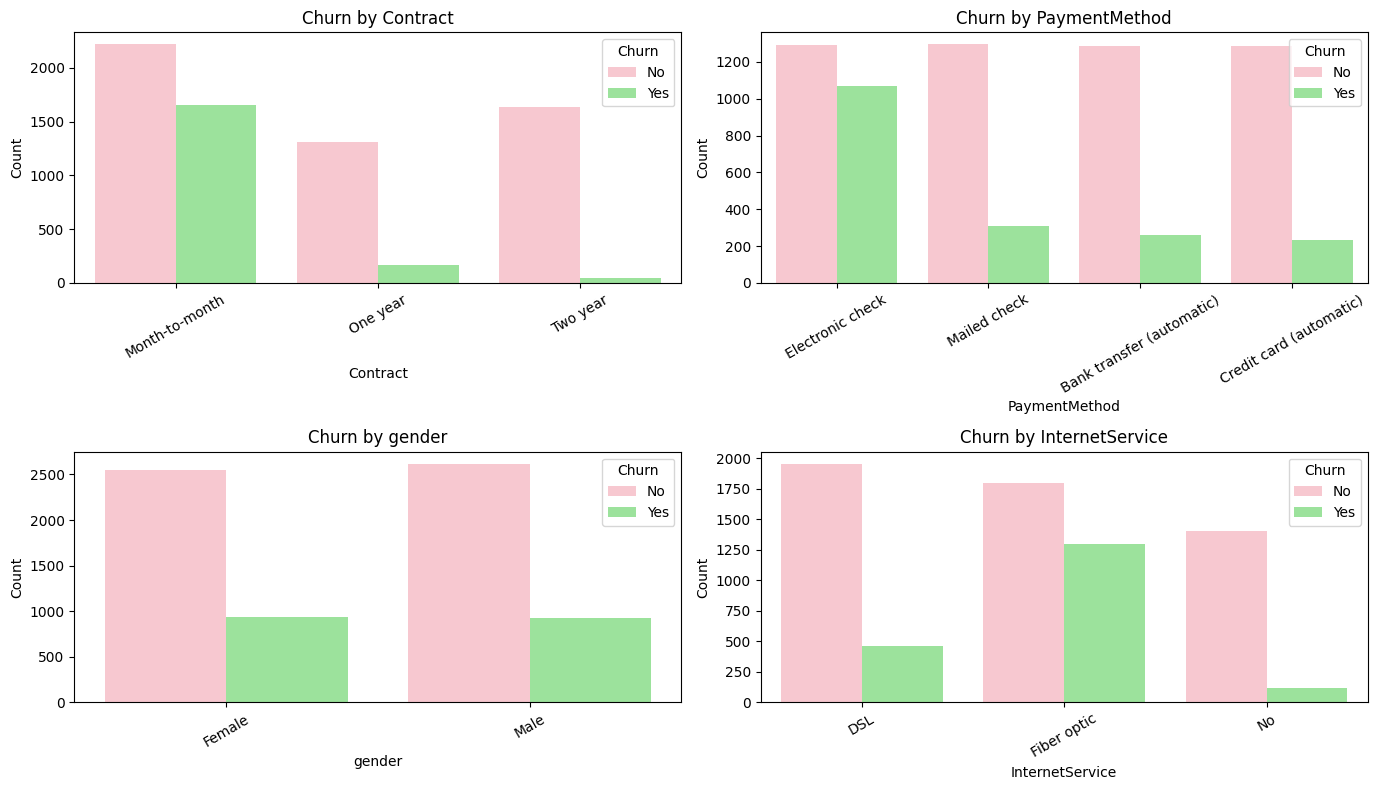

In [19]:
#comparing categorical features with churn rate
cat_features = ['Contract', 'PaymentMethod', 'gender', 'InternetService']

fig, axes = plt.subplots(2,2, figsize=(14,8))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, hue='Churn', palette=['pink', 'lightgreen'], ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

1. 2-year contract shows the lowest churn rate while month-to-month contract shows high churn rate. Hence, flexible option increases the churn rate.
2. People using Electronic check churn more compared to those who use automatic payment methods.
3. Churn rate remains relatively low and almost identical for both genders. 
4. Fiber optic users show high churn rate, indicating dissatisfaction with the service. 

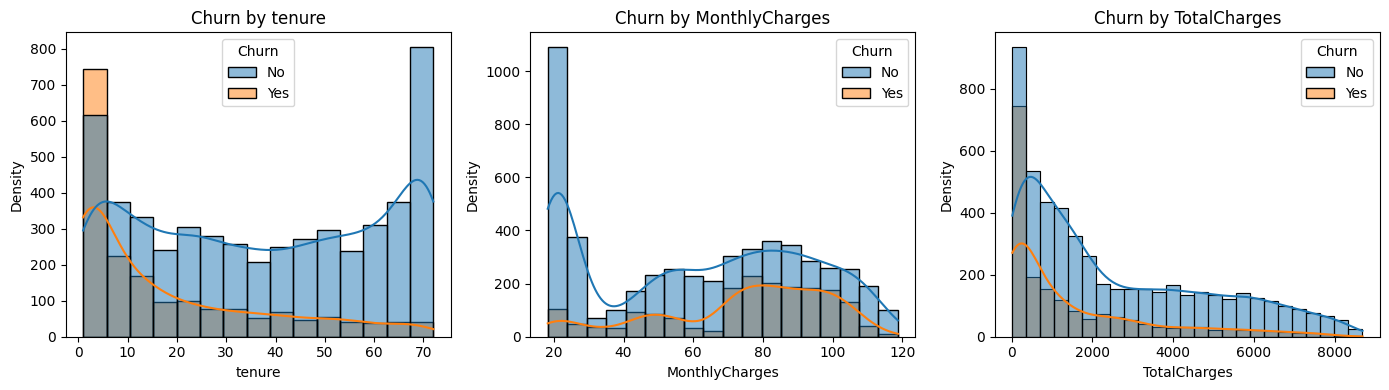

In [20]:
#histplot to compare numerical features with churn rate
nums = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1,3, figsize=(14,4))
axes = axes.flatten()

for i, col in enumerate(nums):
    sns.histplot(data=df, x=col, hue='Churn', color=['orange', 'purple'], kde=True, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

1. Churn is highest during the first few months, with less churn among long term users.(Tenure)
2. Churn is high among users with moderate to high monthly charges. 
3. Churned customers have a low lifetime spending(due to early churn). 

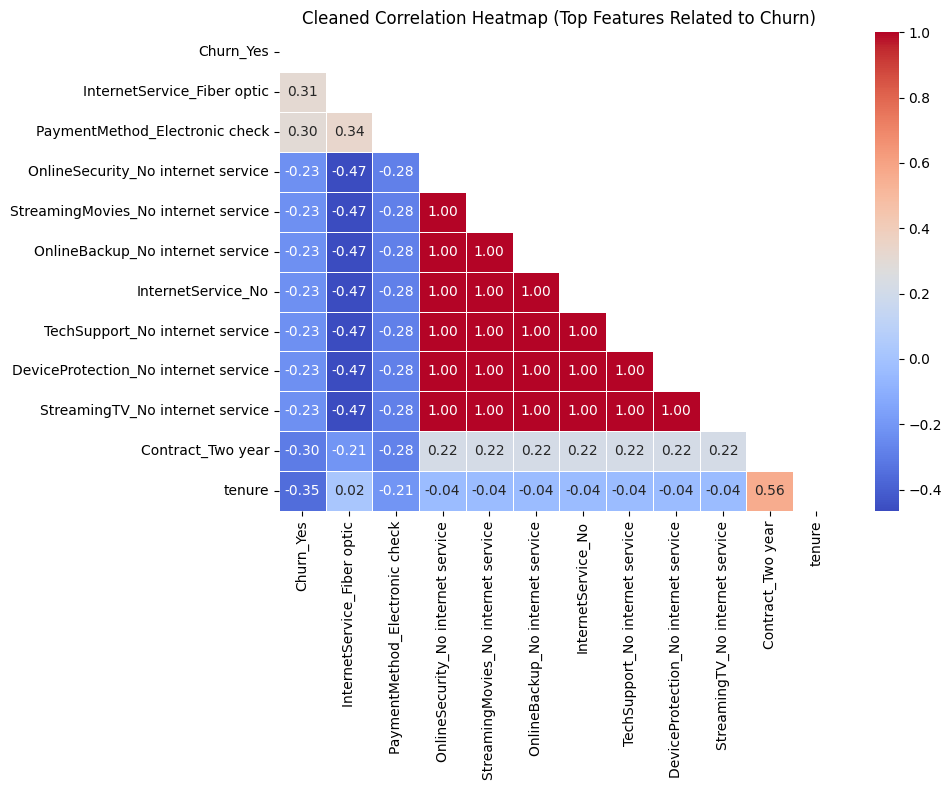

In [21]:
#heatmap to show correlation between churn and other features
target = 'Churn_Yes'
corr_matrix = df_encoded.corr()  #filter correlation with target

target_corr = corr_matrix[[target]].sort_values(by=target, ascending=False)
relevant_features = target_corr[abs(target_corr[target]) > 0.2].index.tolist()

filtered_corr = corr_matrix.loc[relevant_features, relevant_features]

to_drop = []
for col in filtered_corr.columns:
    for row in to_drop:
        if abs(filtered_corr.loc[row, col]) > 0.95:
            to_drop.append(col)
            break

cleaned_corr = filtered_corr.drop(columns=to_drop, index=to_drop)
mask = np.triu(np.ones_like(cleaned_corr, dtype=bool))
plt.figure(figsize=(10, len(cleaned_corr) * 0.5 + 2))
sns.heatmap(cleaned_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Cleaned Correlation Heatmap (Top Features Related to Churn)')
plt.tight_layout()
plt.show()

Logistic Regression and Random Forest Classifier to predict churn

In [22]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
y_train.value_counts()

Churn_Yes
0    3614
1    1308
Name: count, dtype: int64

We can see that the target column is not properly balanced. So, we will also use Synthetic Minority Oversampling Technique(SMOTE) to fix this and compare the models before and after. 

In [24]:
#scaling the data for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#fitting the model on scaled data
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [26]:
#training random forest classifier
from sklearn.ensemble import RandomForestClassifier
#initializing the model
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
#evaluating performance of Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predlog = log_reg.predict(X_test_scaled)
print(f"\nLogistic Regression before SMOTE")
print("Accuracy:", accuracy_score(y_test, y_predlog))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predlog))
print("Classification Report:\n", classification_report(y_test, y_predlog))


Logistic Regression before SMOTE
Accuracy: 0.7393364928909952
Confusion Matrix:
 [[1108  441]
 [ 109  452]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.81      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



In [28]:
#evaluating 
y_predrf = rf_clf.predict(X_test)
print(f"\nRandom Forest Classifier before SMOTE")
print("Accuracy:", accuracy_score(y_test, y_predrf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predrf))
print("Classification Report:\n", classification_report(y_test, y_predrf))


Random Forest Classifier before SMOTE
Accuracy: 0.7853080568720379
Confusion Matrix:
 [[1395  154]
 [ 299  262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110



Resampling

In [29]:
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

In [30]:
#Initializing SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [31]:
#training models on balanced data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

log_reg1 = LogisticRegression(max_iter=1000, class_weight='balanced')
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
log_reg1.fit(X_resampled_scaled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [33]:
rf_clf1.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [34]:
#make predictions
y_pred_log = log_reg1.predict(X_test_scaled)
y_pred_rf = rf_clf1.predict(X_test)

In [35]:
#evaluating Logistic Regression model after SMOTE
print("Logistic Regression After SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression After SMOTE
Accuracy: 0.7649289099526067
Confusion Matrix:
 [[1258  291]
 [ 205  356]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1549
           1       0.55      0.63      0.59       561

    accuracy                           0.76      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.78      0.76      0.77      2110



In [36]:
#evaluating RandomForest Classifier model after SMOTE
print("Random Forest After SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest After SMOTE
Accuracy: 0.7597156398104266
Confusion Matrix:
 [[1281  268]
 [ 239  322]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1549
           1       0.55      0.57      0.56       561

    accuracy                           0.76      2110
   macro avg       0.69      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110



1. Both models showed improved recall for churners after applying SMOTE. 
2. Post-SMOTE, Logistic Regression achieved a more even trade-off between precision and recall, making it better suited for churn classification.
3. Despite its top accuracy (78.5%), Random Forest Classifier poorly identified churners (recall = 0.47) before SMOTE, highlighting class imbalance impact.
4. The model's (RFC) recall for churners improved (0.47 → 0.57), but accuracy slightly dropped.